<a href="https://colab.research.google.com/github/Jakedude18/FOMC_Semantic_Analysis/blob/main/USE_analysis_of_fomc_statements.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



This section sets up the environment for access to the Universal Sentence Encoder on TF Hub and provides examples of applying the encoder to words, sentences, and paragraphs.

In [ ]:
#@title Load the Universal Sentence Encoder's TF Hub module
from absl import logging

import tensorflow as tf

import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [ ]:
%%capture
!pip3 install seaborn

Data Parsing of FOMC statements, all we do here is read in the statements into a list of long strings

In [ ]:

# load in file names

with open("/content/drive/MyDrive/FOMC semantic analysis/names.txt") as names:
    fileNames = names.read().split("\n")

fileNames.pop()


statements = []

for fileName in fileNames:

    with open("/content/drive/MyDrive/FOMC semantic analysis/fomc_cleaned/" + fileName, "r") as file:
        statement = file.read().replace("\n", "")

    statements.append(statement)





FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/FOMC semantic analysis/fomc_cleaned/01_03_01.txt'

Use K-means to Cluster the vectorizations of the FOMC statements


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

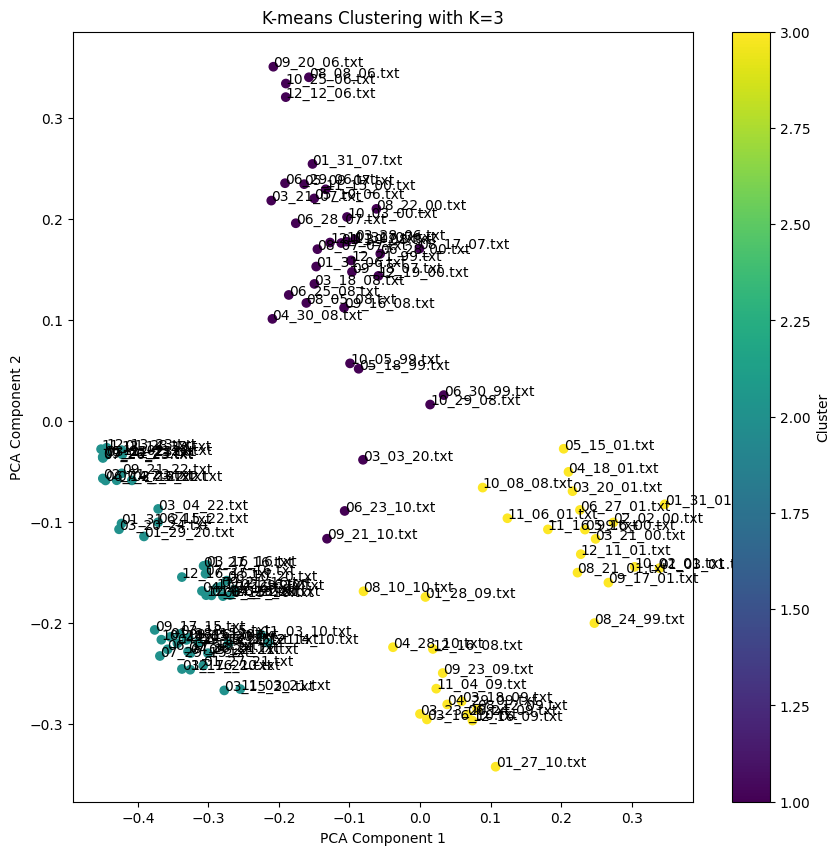

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Vectorize the statements
message_embeddings = embed(statements)

cluster_count = 3

# Run K-means with K=3
kmeans = KMeans(n_clusters= cluster_count)
kmeans.fit(message_embeddings)
clustering = kmeans.labels_

# perform PCA on the statements
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit_transform(message_embeddings)
firstComponent = pca.components_[0]
secondComponent = pca.components_[1]

# projects embeddings onto PCPs
X = []
Y = []


for embedding in message_embeddings:
    X.append(np.dot(embedding.numpy(), firstComponent))
    Y.append(np.dot(embedding.numpy(), secondComponent))

# Plot the data with labels

plt.figure(figsize=(10, 10))

for i in range(len(clustering)):
  clustering[i] += 1

plt.scatter(X, Y, c=clustering, cmap='viridis')
plt.title('K-means Clustering with K=3')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')




# Add labels
for i, fileName in enumerate(fileNames):
    plt.annotate(fileName, (X[i], Y[i]))


from google.colab import files
plt.savefig("clustering.png")
files.download("clustering.png")


Code to make histogram of years for each cluster

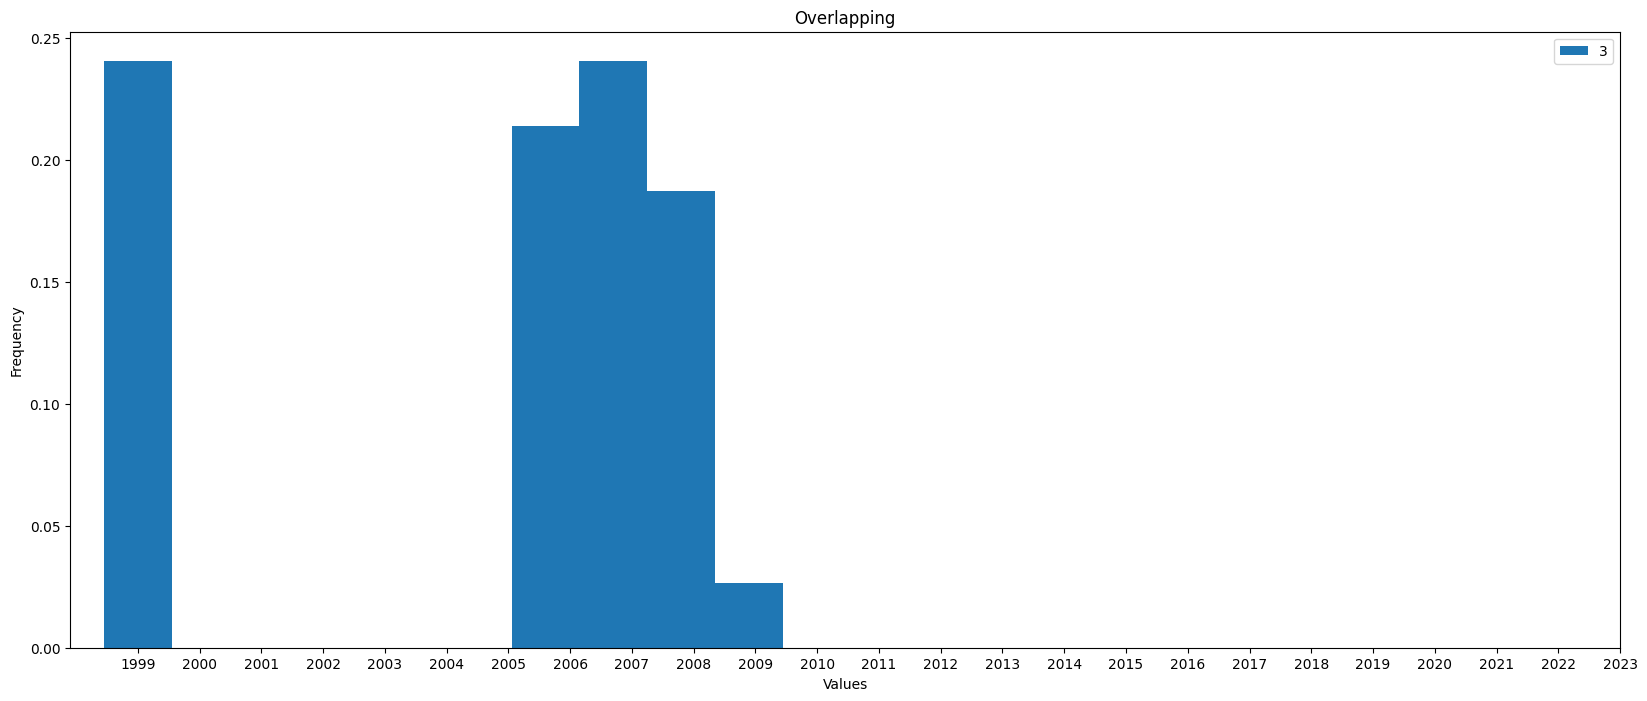

In [ ]:
import matplotlib.pyplot as plt


# scrape through clusters to find frequency

# cluster count 1 through 3

bin_count = 24

idx = 2
years = []

def display_histogram(data, bins=10, xlabel='', ylabel='', title=''):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(range(1999, 2024))  # Setting x-axis ticks to integers only
    plt.legend(loc='upper right')
    plt.title('Overlapping')
    plt.show()


plt.figure(figsize=(20, 8))


for i in range(len(message_embeddings)):

  if (clustering[i] == idx):
    year = int(fileNames[i][6:-4])
    if(year < 50):
        year += 2000
    elif(year > 50):
        year += 1900
    years.append(year)

  # plot the data
plt.hist(years, density=True, align='left', label=str(idx))  # Normalizing the histogram



display_histogram(years, bins=bin_count, xlabel='Values', ylabel='Frequency', title=('Histogram of cluster ' + str(idx)))



Code to generate the VIX profile of each cluster (hisrogram of VIX values for each cluster)

In [ ]:
# load in VIX indexs

# load in file names

with open("/content/drive/MyDrive/FOMC semantic analysis/VIXindices.txt") as index:
    indices = index.read().split("\n")

# pop of last element

indices.pop()

print(indices)

['27.26', '21.09', '22.40', '24.79', '20.73', '22.66', '23.12', '21.70', '24.34', '20.29', '17.47', '21.85', '26.15', '27.17', '26.60', '22.02', '30.96', '24.13', '23.71', '20.88', '24.40', '41.76', '31.18', '28.80', '25.30', '12.95', '11.58', '11.78', '13.03', '15.23', '11.39', '10.66', '10.65', '10.42', '12.19', '12.88', '15.54', '21.56', '29.99', '20.35', '18.53', '23.59', '27.62', '25.79', '20.79', '21.14', '21.14', '31.54', '57.53', '69.96', '51.29', '39.66', '40.06', '36.08', '29.05', '25.45', '23.49', '27.72', '20.54', '23.14', '17.69', '21.08', '26.91', '22.37', '22.35', '19.56', '17.61', '20.44', '13.97', '13.39', '14.50', '12.50', '21.14', '14.33', '17.86', '23.11', '14.99', '13.77', '20.14', '12.83', '13.30', '19.32', '13.19', '16.39', '36.82', '', '61.59', '31.23', '27.57', '24.10', '26.04', '35.55', '22.50', '37.21', '19.23', '17.28', '18.15', '18.31', '20.87', '15.10', '19.29', '31.96', '31.98', '26.67', '29.62', '23.24', '27.99', '25.86', '21.14', '17.87', '22.26', '18.3

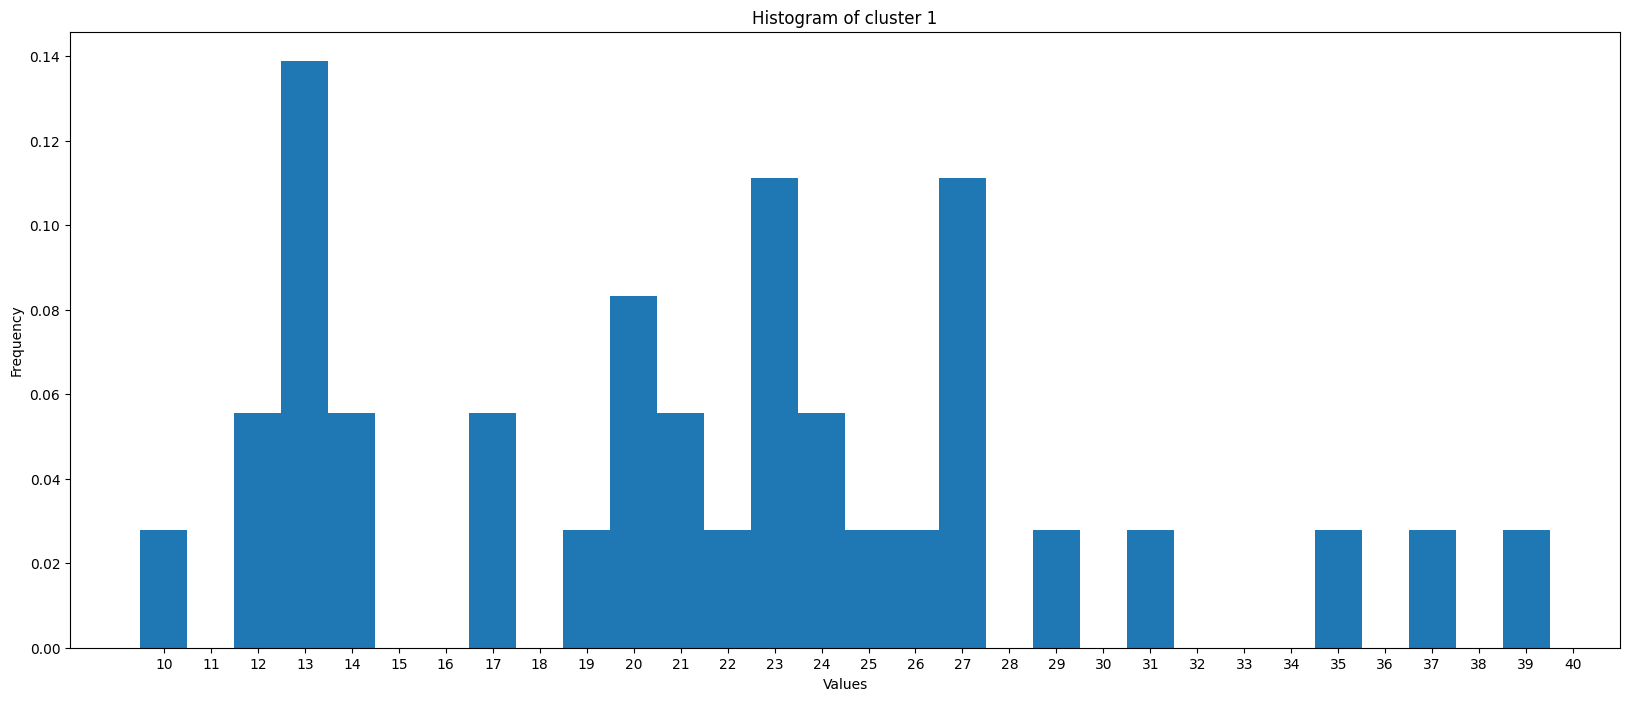

21.947222222222226


In [ ]:
# generate histogram

import matplotlib.pyplot as plt


# scrape through clusters to find frequency

# cluster count 1 through 3

bin_count = 24

idx = 1
tot = 0
VIXs = []

for i in range(len(message_embeddings)):

    if (clustering[i] == idx):
      # fail safe because there's one statement with no VIX value
      if(indices[i] != ''):
        VIX = float(indices[i])
        tot += float(VIX)
        VIXs.append(int(VIX))


def display_histogram(data, bins=10, xlabel='', ylabel='', title=''):
    plt.figure(figsize=(20, 8))
    bin_edges = range(min(data), max(data)+1)  # Adjust bin edges to align with integer values
    plt.hist(data, bins=bin_edges, align='left', density=True)  # Normalizing the histogram
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(range(min(data), max(data)+1))  # Setting x-axis ticks to integers only
    plt.show()

# Example usage
display_histogram(VIXs, bins=bin_count, xlabel='Values', ylabel='Frequency', title=('Histogram of cluster ' + str(idx)))

print(tot / len(VIXs))





Elbow method to find the optimal number of clusters

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(message_embeddings)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')




from google.colab import files
plt.savefig("elbow.png")
files.download("elbow.png")


NameError: name 'message_embeddings' is not defined

Install nltk.corpus to use their stopword library

In [ ]:
%%capture
!pip3 install nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Code to generate word count frequencies for each cluster

In [ ]:
import string
from string import digits
import re

from nltk.corpus import stopwords


#remove the commonCount most common words for the documents

stopWords = stopwords.words("english")

def wordCount(statement, bank, tot=0):
  statement = statement.lower()
  statement = statement.strip(".")
  remove_punc = str.maketrans('', '', string.punctuation)
  statement = statement.translate(remove_punc)

  remove_digits = str.maketrans('', '', digits)
  statement = statement.translate(remove_digits)

  for word in re.split("\s+", statement):
    if word not in stopWords:
      if word in bank:
        bank[word] += 1
      else:
        bank[word] = 1
      tot += 1
  return tot

#word count on all the statements to remove the most used words

totalBank = dict()

for statement in statements:
  wordCount(statement, totalBank)

#Sort totalBank

totalBank = dict(sorted(totalBank.items(), key = lambda a: a[1], reverse = True))


commonCount = 10
commonWords = (list(totalBank.keys())[0:commonCount])


import matplotlib.pyplot as plt

# scrape through clusters to find frequency

# cluster count 1 though 3

bank = dict()
idx = 3
tot = 0

for i in range(len(message_embeddings)):

    if (clustering[i] == idx):
      # fail safe because there's one statement with no VIX value
      tot += wordCount(statements[i],bank)

#Remove the common words
collisions = 0
totRemove = tot
for commonWord in commonWords:
  if commonWord in bank:
    totRemove -= bank[commonWord]
    bank.pop(commonWord)
    collisions += 1

#sort the bank

bank = dict(sorted(bank.items(), key = lambda a: a[1], reverse = True))


# Extract keys and values
labels = list(bank.keys())
values = list(bank.values())

# Normalize values
for i in range(len(values)):
  values[i] = values[i] / totRemove



# Plotting
plt.figure(figsize=(20, 8))
plt.bar(labels[:10], values[:10])
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Word Count for cluster ' + str(idx))
plt.xticks(fontsize=20)


from google.colab import files
plt.savefig("endWords3.png")
files.download("endWords3.png")

print("Total words before: " + str(tot))
print("Taking away the " + str(commonCount) + " most commons words from the clustsers")
print("Total words after taking out common words: " + str(totRemove))
print("Number of collisions (overlapping words): " + str(collisions))






LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************
